# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 6: APIs + Random Forests

## Overview

This week, we learned about ensemble methods, APIs, and natural language processing. Now we're going to put these skills to the test. You've been hired by Netflix to examine what factors lead to certain ratings for movies. Given that Netflix does not currently store this type of data, your boss has suggested that you collect ratings and reviews data from IMDB. Netflix is no stranger to machine learning, however:

- Netflix uses random forests and decision trees to predict what types of movies an individual user may like.
- Using unsupervised learning techniques, they are able to continually update suggestions, listings, and other features of it's user interface.
- Netflix, however, hasn't focused on collecting data on the top movies of all time, and would like to add some of them to their offerings based on popularity and other factors.

**Point:** Your boss isn't sure where to start on this project, so your task is to collect the data and construct a random forest to understand what factors contribute to ratings.


## Project Summary
Acquire data from IMDB, and use whatever metrics you can collect to predict whether it is a good movie.

When you've finished your analysis, Netflix would like a report detailing your findings, with recommendations as to next steps.

Here are some questions to keep in mind:

- What factors are the most direct predictors of rating?
- You can use rating as your target variable. But it's up to you whether to treat it as continuous, binary, or multiclass.

**Goal**: Completed Jupyter notebook that includes modeling using a random forest and an blog post explaining your findings.

---

## Requirements
This is deliberately open ended. There is no starter code. It's up to you how to acquire the data, store the data, and what features you want to use. 

We expect you to use a **tree-based model**, but the rest of the decisions are up to you. 

We will be looking for the following things:
 - A clear problem statement & description of the goals of your study to be included in the final report
 - Data from IMDB
 - Cleaned and refined data
 - Visualization. Plots that describe your data and evaluate your model.
 - Tree-based models (use any combination of ensemble techniques: random forests, bagging, boosting). 
 - A blog post presenting the results of your findings as a report to Netflix, including:
  - a problem statement,
  - summary statistics of the various factors (e.g. year, number of ratings, etc.),
  - your model,
  - at least 2 graphics,
  - and your recommendations for next steps!



## Necessary Deliverables / Submission

- Materials must be in a clearly labeled Jupyter notebook
- Link to the blog post with your report in your Jupyter notebook
- Materials must be submitted to GitHub by Thursday of Week 7 (July 21).

---

## Suggested Ways to Get Started

- You can get data on the top 250 movies on IMDB using the [IMBDpie API](https://github.com/richardasaurus/imdb-pie) 
- If you need additional data, you can either research additional APIs, or scrape it yourself using BeautifulSoup
- Read the docs for whatever technologies you use. Most of the time, there is a tutorial that you can follow, but not always, and learning to read documentation is crucial to your success!
- Document **everything**.

### Useful Resources

[Documentation for BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

---

### Project Feedback + Evaluation

[Attached here is a complete rubric for this project.](./project-06-rubric.md)

Your instructors will score each of your technical requirements using the scale below:

    Score | Expectations
    ----- | ------------
    **0** | _Incomplete._
    **1** | _Does not meet expectations._
    **2** | _Meets expectations, good job!_
    **3** | _Exceeds expectations, you wonderful creature, you!_

 This will serve as a helpful overall gauge of whether you met the project goals, but __the more important scores are the individual ones__ above, which can help you identify where to focus your efforts for the next project!



# Use the IMDBpie API to pull data from IMDB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup
from imdbpie import Imdb
from sklearn.feature_extraction.text import CountVectorizer

%config InlineBackend.figure_format = 'retina'

#from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [2]:
imdb = Imdb()
imdb = Imdb(anonymize=True) # to proxy requests
top_250 = pd.DataFrame(data=imdb.top_250())

In [3]:
#top_250['tconst']
#review_list = []

#for i in top_250['tconst']:
#review_list.append(imdb.get_title_reviews(i))

In [4]:
top_250 = top_250.drop(['can_rate', 'image'], axis=1)
top_250.head()

num_votes  rating     tconst                     title     type  year
0    1758117     9.3  tt0111161  The Shawshank Redemption  feature  1994
1    1200665     9.2  tt0068646             The Godfather  feature  1972
2     824593     9.0  tt0071562    The Godfather: Part II  feature  1974
3    1741134     9.0  tt0468569           The Dark Knight  feature  2008
4     471830     8.9  tt0050083              12 Angry Men  feature  1957

# Pull in extra data for the top 250 movies from OMDB

In [5]:
# create a list of title id's for the top 250 IMDB movies
top_250_t = top_250['tconst']
t_const = top_250_t.tolist()

# for each movie title pull extra data from OMDB API
top_250_list = []
for t in t_const:
    payload = {'i':t,'plot':'short','r':'json', 'tomatoes':'True'} # modify the URL parameters here
    URL = 'http://www.omdbapi.com/' # base URL
    r = requests.get(URL, params=payload)
    top_250_list.append(r.json())

column_names = top_250_list[0].keys() # create column names variable

# create a list of lists of the values from the api requests
m_list = []
for movie in top_250_list:
    vals = movie.values()
    m_list.append(vals)

# create the top 250 dataframe
top_250_df = pd.DataFrame(m_list, columns=column_names)

# Pull in Movie Reviews from IMDB using Requests and Beautiful Soup

In [6]:
reviews = []
for t in (t_const):
    URL = ('http://www.imdb.com/title/' + t + '/reviews')
    r2 = requests.get(URL).text
    soup = BeautifulSoup(r2, 'html.parser')
    page = soup.find_all('p')
    foo = str(page)
    regex = re.compile('[^a-zA-Z]')
    new = regex.sub(' ', foo)
    reviews.append(new)

In [7]:
reviews

['  p class  navCategory   n a href   movies in theaters  ref  nv tp inth    Movies  a   n                 a href   chart toptv  ref  nv tp tv       TV  a  br   n                 amp   a href   showtimes  ref  nv tp sh    Showtimes  a   p    p class  navCategory   n a href   search name gender male female amp ref  nv tp cel    Celebs  a   n                 a href   awards central  ref  nv tp awrd    Events  a  br   n                 amp   a href   gallery rg          ref  nv tp ph    Photos  a   p    p class  navCategory   n a href   news top ref  nv tp nw    News  a   amp  br   n a href   boards  ref  nv tp bd    Community  a   p    p class  navCategory singleLine watchlist   a href   list watchlist ref  nv wl all    Watchlist  a  n  p    p class  navCategory   n a href  http   pro imdb com signup index html rf cons nb hm amp ref  cons nb hm   n img alt  IMDbPro Menu  src  http   i media imdb com images SF a      cf a   e   fef     ebfbc navbar imdbpro logo nb png    n  a  n  p    p I

| Column  | Type  |  Description |
|---------|-------|--------------|
| Plot | Text | Description of plot |
| Rated | Text | Movie rating |
| Title | Text | Title name |
| DVD| Date | Date movie came to DVD |
| Genre | Text | CSV of genre types |
| Language | Text | CSV of languages |
| Country | Text | CSV of countries |
| BoxOffice | Text | Gross $ values of box office sales |
| Runtime | Text | Movie run time |
| tomatoReviews | Int | # of rotten tomato reviews |
| imdbID | Text | Unique movie ID |
| Metascore | Int | Metacritic Scores |
| Year | Int | Year movie was released|
| Production | Text | Movie studio |
| Reviews | Text | User reviews on IMDB |




# Converting the date columns to datetime format

In [12]:
# converts the listed columns to datetime formats
top_250_df['Released'] = pd.to_datetime(top_250_df['Released'], format='%d %b %Y', errors='coerce')
top_250_df['Year'] = pd.to_datetime(top_250_df['Year'], format='%Y', errors='coerce')

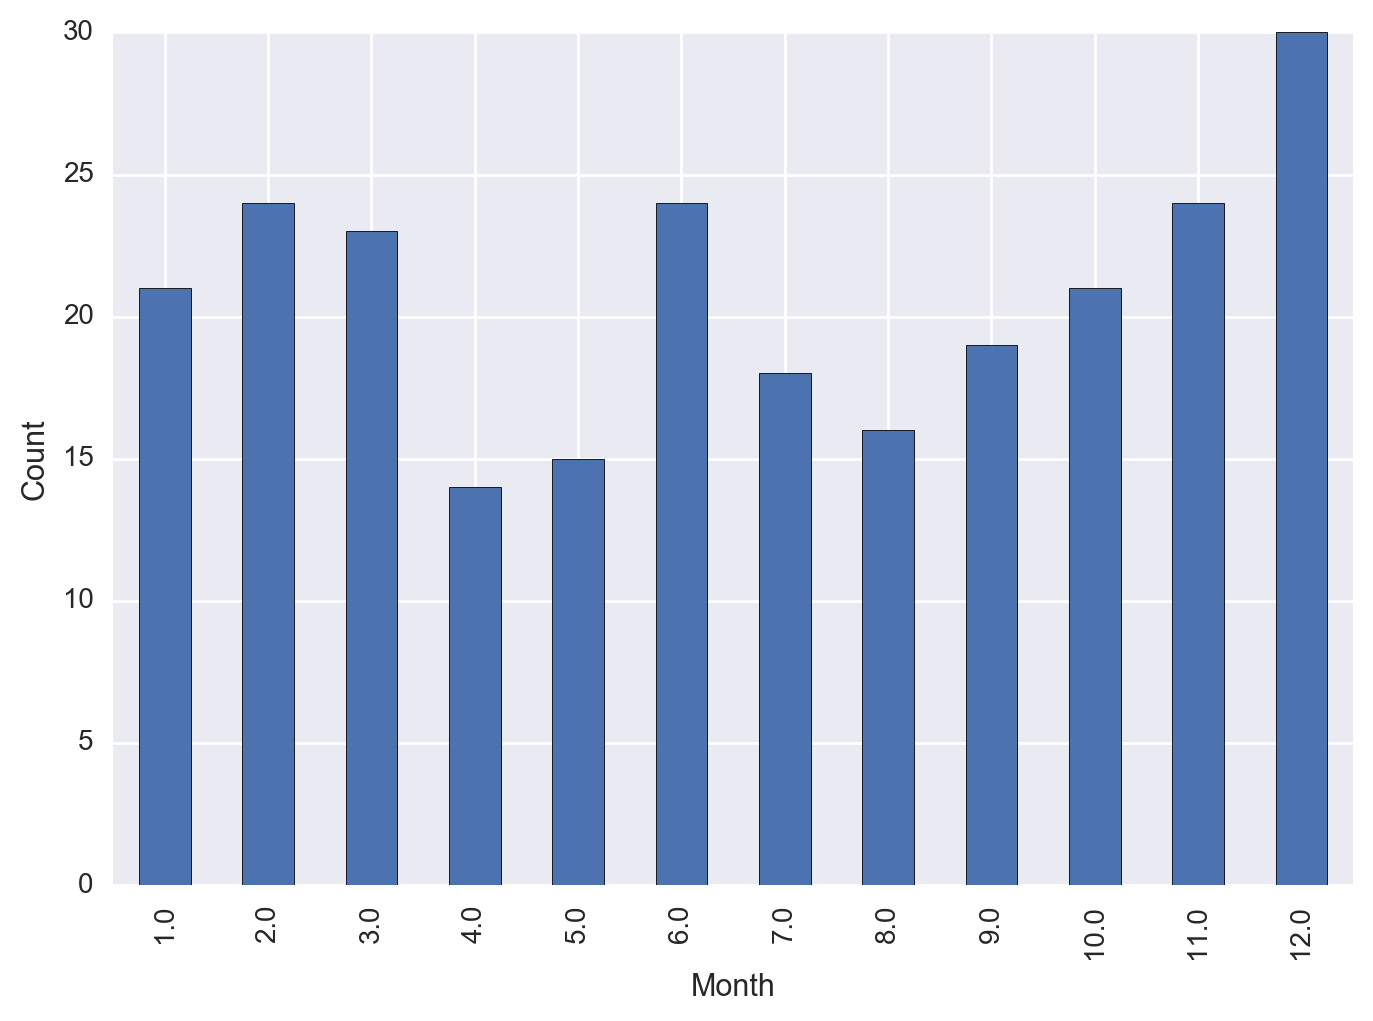

In [13]:
top_250_df['Released'].groupby(top_250_df['Released'].dt.month).count().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()
# df.groupby(df.date.dt.month).count().plot(kind="bar")

In [14]:
import seaborn as sns

In [16]:
top_250_df.to_csv('~/Desktop/top_250_df.csv', encoding='utf-8')

In [35]:
# Dummy Variable columns: Production, Rated
# Need to split by CSV: Genre, Actors, Director, Language, Country
# Text columns that need Count Vectorizer: Plot, Writer, tomatoConsensus
# Needs to be converted to Int: imdbVotes, tomatoUserReviews, BoxOffice, Runtime, tomatoReviews, Year
# Target variable: imdbRating

In [36]:
drop_columns = ['tomatoImage', 'Response', 'tomatoURL', 'Type', 'Website', 'Poster', 
                'tomatoMeter', 'tomatoUserRating', 'tomatoRotten', 'tomatoFresh', 
                'Awards', 'tomatoUserMeter', 'Metascore', 'imdbID', 'DVD', 'tomatoRating', 
                'Title', 'Language', 'Country', 'Writer', 'BoxOffice', 'Year']

top_250_trimmed_df = top_250_df.drop(drop_columns, axis=1)
top_250_trimmed_df.dtypes

Plot                         object
Rated                        object
Production                   object
Actors                       object
imdbVotes                    object
tomatoConsensus              object
Director                     object
Released             datetime64[ns]
tomatoUserReviews            object
Genre                        object
imdbRating                   object
Runtime                      object
tomatoReviews                object
dtype: object

# Convert continuous variables to int values

In [37]:
top_250_trimmed_df['imdbVotes'] = [int(row.replace(",","")) for row in top_250_trimmed_df['imdbVotes']]
top_250_trimmed_df['tomatoReviews'] = [int(float(row.replace("N/A", "108.1" ))) for row in top_250_trimmed_df['tomatoReviews']]
top_250_trimmed_df['tomatoUserReviews'] = [int(float(row.replace("N/A", "1474214.07"))) for row in top_250_trimmed_df['tomatoUserReviews']]

First we removed the N/A values, then we calculated the mean values for these below. Once we had the mean values for all the existing data points we re ran the conversion above. This time however we hard coded the mean values to act as a replacement value for missing values.

* top_250_trimmed_df['tomatoUserReviews'].mean() = 1474214.07
* top_250_trimmed_df['tomatoReviews'].mean() = 108.1

In [38]:
top_250_trimmed_df.dtypes

Plot                         object
Rated                        object
Production                   object
Actors                       object
imdbVotes                     int64
tomatoConsensus              object
Director                     object
Released             datetime64[ns]
tomatoUserReviews             int64
Genre                        object
imdbRating                   object
Runtime                      object
tomatoReviews                 int64
dtype: object

# Transform the Actors and Director columns so that they can be vectorized using CountVectorizer

In [39]:
# runs through the dataframe column and replaces the values
# with actors names combined together
for i, row in enumerate(top_250_trimmed_df['Actors']):
    row_1 = row.replace(", ",",")
    row_2 = row_1.replace(" ", "").lower()
    top_250_trimmed_df.set_value(i,'Actors', row_2)
    
top_250_trimmed_df.Actors.head()

0     timrobbins,morganfreeman,bobgunton,williamsadler
1    marlonbrando,alpacino,jamescaan,richards.caste...
2       alpacino,robertduvall,dianekeaton,robertdeniro
3    christianbale,heathledger,aaroneckhart,michael...
4      martinbalsam,johnfiedler,leej.cobb,e.g.marshall
Name: Actors, dtype: object

In [40]:
# runs through the dataframe column and replaces the values
# with directors names combined together
for i, row in enumerate(top_250_trimmed_df['Director']):
    row_1 = row.replace(", ",",")
    row_2 = row_1.replace(" ", "").lower()
    top_250_trimmed_df.set_value(i,'Director', row_2)
    
top_250_trimmed_df.Director.head()

0         frankdarabont
1    francisfordcoppola
2    francisfordcoppola
3      christophernolan
4           sidneylumet
Name: Director, dtype: object

# Use REGEX to combine production studios together.

In [41]:
top_250_trimmed_df.groupby('Production').count()

replacements = {
    'Production': {
        r'20th Century Fox Film Corporat': '20th Century Fox',
        r'Buena Vista.*': 'Buena Vista Pictures',
        r'Disney.*': 'Disney',
        r'Dream[Ww]orks.*': 'DreamWorks',
        r'Dream Works': 'DreamWorks',
        r'Twentieth Century Fox.*': '20th Century Fox',
        r'Warner Bros\..*': 'Warner Bros.',
        r'WARNER BROTHERS PICTURES' : 'Warner Bros.',
        r'Warner Home Video': 'Warner Bros.',
        r'Walt Disney': 'Disney',
        r'Hollywood/Buena Vista Pictures': 'Buena Vista Pictures',
        r'Sony Pictures.*': 'Sony Pictures',
        r'The Weinstein Co.*': 'The Weinstein Co.',
        r'UTV.*': 'UTV Motion Pictures',
        r'United Artists.*': 'United Artists',
        r'Universal.*': 'Universal Pictures',
        r'Paramount.*': 'Paramount Pictures',
        r'Orion.*': 'Orion Pictures',
        r'Newmarket Film.*': 'Newmarket Film Group',
        r'Miramax.*': 'Miramax Films',
        r'20th Century 20th Century Fox': '20th Century Fox'
    }
}

top_250_trimmed_df.replace(replacements, regex=True, inplace=True)

top_250_trimmed_df.groupby('Production', sort=True).count()

Plot  Rated  Actors  imdbVotes  tomatoConsensus  \
Production                                                                      
20th Century Fox                13     13      13         13               13   
Aamir Khan Productions           1      1       1          1                1   
Adlabs Film                      1      1       1          1                1   
Almi Cinema 5                    1      1       1          1                1   
Anchor Bay Entertainment         1      1       1          1                1   
Artisan Entertainment            1      1       1          1                1   
Avsar Yapim                      1      1       1          1                1   
B4U US                           1      1       1          1                1   
BFI Production                   1      1       1          1                1   
Big Pictures                     1      1       1          1                1   
Buena Vista Pictures             6      6       6          6                6   
CJ Entertainment                 1      1       1          1                1   
Cinerez                          1      1       1          1                1   
Columbia Pictures               10     10      10         10               10   
Cowboy Pictures                  1      1       1          1                1   
Criterion Collection             6      6       6          6                6   
Dimension Films                  1      1       1          1                1   
Disney                           9      9       9          9                9   
DreamWorks                       4      4       4          4                4   
ENIC                             1      1       1          1                1   
Ealing Studios                   1      1       1          1                1   
First National Pictures Inc.     1      1       1          1                1   
Focus Features                   2      2       2          2                2   
Foremco                          1      1       1          1                1   
Fox Films                        1      1       1          1                1   
Fox Searchlight                  2      2       2          2                2   
Gramercy Pictures                3      3       3          3                3   
IFC Films                        1      1       1          1                1   
ITVS                             1      1       1          1                1   
Inferno Entertainment            1      1       1          1                1   
...                            ...    ...     ...        ...              ...   
Magnolia Pictures                1      1       1          1                1   
Miramax Films                   13     13      13         13               13   
N/A                              7      7       7          7                7   
New Line Cinema                  5      5       5          5                5   
Newmarket Film Group             3      3       3          3                3   
October Films                    1      1       1          1                1   
Open Road Films                  1      1       1          1                1   
Orion Pictures                   3      3       3          3                3   
Paramount Pictures              23     23      23         23               23   
Picturehouse                     1      1       1          1                1   
RKO Radio Pictures               2      2       2          2                2   
Rialto Pictures                  3      3       3          3                3   
Saavn                            1      1       1          1                1   
Shinchosha Company               1      1       1          1                1   
Sony Pictures                   10     10      10         10               10   
Starmaker Entertainment          1      1       1          1                1   
Summit Entertainment             1      1       1          1 

In [42]:
dummy_df = top_250_trimmed_df[['Rated', 'Production']]
dummy_vars = pd.get_dummies(dummy_df)
dummy_vars.head()

Rated_APPROVED  Rated_G  Rated_N/A  Rated_NOT RATED  Rated_PASSED  \
0             0.0      0.0        0.0              0.0           0.0   
1             0.0      0.0        0.0              0.0           0.0   
2             0.0      0.0        0.0              0.0           0.0   
3             0.0      0.0        0.0              0.0           0.0   
4             1.0      0.0        0.0              0.0           0.0   

   Rated_PG  Rated_PG-13  Rated_R  Rated_UNRATED  Production_20th Century Fox  \
0       0.0          0.0      1.0            0.0                          0.0   
1       0.0          0.0      1.0            0.0                          0.0   
2       0.0          0.0      1.0            0.0                          0.0   
3       0.0          1.0      0.0            0.0                          0.0   
4       0.0          0.0      0.0            0.0                          0.0   

                    ...                    Production_TriStar Pictures  \
0                   ...                                            0.0   
1                   ...                                            0.0   
2                   ...                                            0.0   
3                   ...                                            0.0   
4                   ...                                            0.0   

   Production_Turner Entertainment  Production_UTV Motion Pictures  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                              0.0                             0.0   

   Production_United Artists  Production_Universal Pictures  Production_VCI  \
0                        0.0                            0.0             0.0   
1                        0.0                            0.0             0.0   
2                        0.0                            0.0             0.0   
3                        0.0                            0.0             0.0   
4                        0.0                            0.0             0.0   

   Production_Warner Bros.  Production_Yash Raj Films  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
3                      1.0                        0.0   
4                      0.0                        0.0   

   Production_Zenith International Films  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Production_Zweites Deutsches Fernsehen  
0                                     0.0  
1                                     0.0  
2                                     0.0  
3                                     0.0  
4                                     0.0  

[5 rows x 82 columns]

In [43]:
top_250_cvec = top_250_trimmed_df[['tomatoConsensus', 'Actors', 'Director', 'Plot', 'Genre']]
top_250_cvec.head()

tomatoConsensus  \
0  The Shawshank Redemption is an uplifting, deep...   
1  One of Hollywood's greatest critical and comme...   
2  Drawing on strong performances by Al Pacino an...   
3  Dark, complex and unforgettable, The Dark Knig...   
4  Sidney Lumet's feature debut is a superbly wri...   

                                              Actors            Director  \
0   timrobbins,morganfreeman,bobgunton,williamsadler       frankdarabont   
1  marlonbrando,alpacino,jamescaan,richards.caste...  francisfordcoppola   
2     alpacino,robertduvall,dianekeaton,robertdeniro  francisfordcoppola   
3  christianbale,heathledger,aaroneckhart,michael...    christophernolan   
4    martinbalsam,johnfiedler,leej.cobb,e.g.marshall         sidneylumet   

                                                Plot                 Genre  
0  Two imprisoned men bond over a number of years...          Crime, Drama  
1  The aging patriarch of an organized crime dyna...          Crime, Drama  
2  The early life and career of Vito Corleone in ...          Crime, Drama  
3  When the menace known as the Joker wreaks havo...  Action, Crime, Drama  
4  A jury holdout attempts to prevent a miscarria...          Crime, Drama

# Vectorize the columns

In [44]:
cvec = CountVectorizer(stop_words='english')

### Genre

In [45]:
cvec.fit(top_250_cvec['Genre'])
cvec_genres = pd.DataFrame(data=cvec.transform(top_250_cvec['Genre']).todense(),
                          columns=cvec.get_feature_names())
cvec_genres.head()
word_counts_genres = cvec_genres.sum(axis=0)
word_counts_genres.sort_values(ascending=False).head(10)

drama        177
crime         60
adventure     56
comedy        45
thriller      40
mystery       34
action        32
biography     24
fantasy       22
sci           22
dtype: int64

### tomatoConsensus

In [46]:
model = cvec.fit(top_250_cvec['tomatoConsensus'])
cvec_consensus = pd.DataFrame(data=cvec.transform(top_250_cvec['tomatoConsensus']).todense(), 
                                  columns=cvec.get_feature_names())
                           
cvec_consensus.head()
word_counts_consensus = cvec_consensus.sum(axis=0)
word_counts_consensus.sort_values(ascending=False).head(10)

performances    29
film            27
classic         23
director        20
story           18
performance     16
masterpiece     16
funny           15
action          15
epic            13
dtype: int64

### Actors

In [47]:
model = cvec.fit(top_250_cvec['Actors'])
cvec_actors = pd.DataFrame(data=cvec.transform(top_250_cvec['Actors']).todense(), 
                                  columns=cvec.get_feature_names())
                           
cvec_actors.head()
word_counts_actors = cvec_actors.sum(axis=0)
word_counts_actors.sort_values(ascending=False).head(10)

robertdeniro        7
harrisonford        7
leonardodicaprio    6
tomhanks            6
aamirkhan           5
clinteastwood       5
jamesstewart        4
markhamill          4
alpacino            4
tomhardy            4
dtype: int64

### Director

In [48]:
model = cvec.fit(top_250_cvec['Director'])
cvec_director = pd.DataFrame(data=cvec.transform(top_250_cvec['Director']).todense(), 
                                  columns=cvec.get_feature_names())
                           
cvec_director.head()
word_counts_director = cvec_director.sum(axis=0)
word_counts_director.sort_values(ascending=False).head(10)

christophernolan    7
alfredhitchcock     7
stevenspielberg     7
martinscorsese      7
stanleykubrick      7
quentintarantino    6
billywilder         5
charleschaplin      5
hayaomiyazaki       5
akirakurosawa       5
dtype: int64

### Plot

In [49]:
model = cvec.fit(top_250_cvec['Plot'])
cvec_plot = pd.DataFrame(data=cvec.transform(top_250_cvec['Plot']).todense(), 
                                  columns=cvec.get_feature_names())
                           
cvec_plot.head()
word_counts_plot = cvec_plot.sum(axis=0)
word_counts_plot.sort_values(ascending=False).head(10)

man       28
life      25
young     25
war       24
world     19
help      19
old       17
new       16
son       14
police    13
dtype: int64

### Reviews

In [50]:
model = cvec.fit(reviews)
cvec_reviews = pd.DataFrame(data=cvec.transform(reviews).todense(), 
                                  columns=cvec.get_feature_names())
                           
cvec_reviews.head()
word_counts_reviews = cvec_reviews.sum(axis=0)

wcr = word_counts_reviews.sort_values(ascending=False).head(50)

NameError: name 'reviews' is not defined

### Took the top 50 words from reviews and filtered out the words that are either html artifacts (i.e. br, n, href, class) or generic english words that are not descriptive (i.e. movie, film, character). This approach is somewhat subjective in it's selection.

In [51]:
filter_reviews = ['best', 'great', 'life', 'good', 'love', 'action'] # somewhat subjective
reviews_df = cvec_reviews[filter_reviews]
reviews_df.head()

NameError: name 'cvec_reviews' is not defined

In [52]:
cvec_df = pd.concat([cvec_actors, cvec_consensus, cvec_director], axis=1)
cvec_df.head()

aamirkhan  aaroneckhart  abdelahmedghili  adambaldwin  adamdriver  \
0          0             0                0            0           0   
1          0             0                0            0           0   
2          0             0                0            0           0   
3          0             1                0            0           0   
4          0             0                0            0           0   

   adolphemenjou  adrienbrody  agnesmoorehead  ahneyher  ajaydevgn  \
0              0            0               0         0          0   
1              0            0               0         0          0   
2              0            0               0         0          0   
3              0            0               0         0          0   
4              0            0               0         0          0   

      ...      vittoriodesica  wai  wesanderson  williamwyler  \
0     ...                   0    0            0             0   
1     ...                   0    0            0             0   
2     ...                   0    0            0             0   
3     ...                   0    0            0             0   
4     ...                   0    0            0             0   

   wolfgangpetersen  woodyallen  wookpark  yasujirôozu  yavuzturgul  \
0                 0           0         0            0            0   
1                 0           0         0            0            0   
2                 0           0         0            0            0   
3                 0           0         0            0            0   
4                 0           0         0            0            0   

   çaganirmak  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 2732 columns]

In [53]:
word_counts = cvec_df.sum(axis=0)
wc = word_counts.sort_values(ascending=False).head(100)
wc.tail()

times            5
thrills          5
love             5
character        5
unforgettable    5
dtype: int64

# Combine the original DataFrame values with the reviews DataFrame to get our training and testing datasets.

In [54]:
master_training_df = pd.merge(top_250_trimmed_df, reviews_df, left_index=True, right_index=True)
X = master_training_df.drop(['Plot','Rated','Production','Actors', 'tomatoConsensus', 'Director', 'Genre',
                             'imdbRating', 'Runtime'], axis=1).astype(int)
y = np.ravel(master_training_df[['imdbRating']])
print X.dtypes
y[:10]

NameError: name 'reviews_df' is not defined

In [55]:
np.ravel(X_train.index.tolist())
reviews_df = pd.DataFrame(data=reviews)
reviews_df_cvec = reviews_df.iloc[np.ravel(X_train.index.tolist())]
reviews_df_cvec.columns = ['reviews']

NameError: name 'X_train' is not defined

In [56]:
model = cvec.fit(reviews_df_cvec['reviews'])
cvec_reviews_training = pd.DataFrame(data=cvec.transform(reviews_df_cvec['reviews']).todense(), 
                                  columns=cvec.get_feature_names())
                           
cvec_reviews_training.head()
word_counts_reviews_training = cvec_reviews_training.sum(axis=0)

wcr = word_counts_reviews_training.sort_values(ascending=False).head(50)
wcr

NameError: name 'reviews_df_cvec' is not defined

# Normalize the values

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()


X_ss = ss.fit_transform(X, y)
X_scaled = pd.DataFrame(data=X_ss, columns=X.columns)
X_scaled.head()

NameError: name 'X' is not defined

In [58]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

rf = RandomForestRegressor(n_estimators=100) # initialize
rf.fit(X_train, y_train)

NameError: name 'X_scaled' is not defined

In [59]:
pd.DataFrame(data=rf.feature_importances_, index=X_train.columns)

NameError: name 'rf' is not defined

In [60]:
y_pred = rf.predict(X_test)

NameError: name 'rf' is not defined

In [61]:
pred_vs_act_df = pd.DataFrame(data=[y_pred,y_test], index=['predicted', 'Actual']).T
pred_vs_act_df.head()

NameError: name 'y_pred' is not defined

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print "MAE:", mae, "MSE:", mse

NameError: name 'y_test' is not defined

In [63]:
plt.scatter(y_pred,y_test)
plt.plot([8,9.5],[8,9.5])
plt.xlabel('Predicted IMDB Rating')
plt.ylabel('Actual IMDB Rating')
plt.show()

NameError: name 'y_pred' is not defined